In [75]:
import numpy as np  
import pandas as pd  
import plotly.express as px  # Для создания интерактивных визуализаций
import plotly.graph_objects as go  # Для кастомных графиков
from plotly.subplots import make_subplots  # Для создания subplots
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

df = pd.read_csv('ParisHousing.csv', header=0, sep=',')
df['log_pricePerM2'] = np.log1p(df['price'] / df['squareMeters'])
df.drop(columns=['price', 'squareMeters'], inplace=True) # Удаляем оригинальную колонку

# Проверим структуру данных
print("Размер датасета (строки, колонки):", df.shape)
print("\nПервые 10 строк датасета:")
df.head(10)

Размер датасета (строки, колонки): (10000, 16)

Первые 10 строк датасета:


,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,log_pricePerM2
0,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,4.616009
1,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,4.616210
2,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,4.615732
3,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,4.615415
4,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,4.616827
5,36,0,1,17,39489,8,6,2012,0,1,2009,4552,757,0,1,4.616217
6,10,1,1,99,6450,10,9,1995,1,1,5930,9453,848,0,5,4.616499
7,100,1,0,11,98155,3,4,2003,1,0,6326,4748,654,0,10,4.615573
8,3,0,0,61,9047,8,3,2012,1,1,632,5792,807,1,5,4.615477
9,42,0,0,15,71019,5,8,2021,1,1,5198,5342,591,1,3,4.615692


In [76]:
print("Названия колонок:")
print(df.columns.tolist())
print("\nИнформация о датасете:")
df.info()  # Показываем информацию о типах данных и наличии пропусков

Названия колонок:
['numberOfRooms', 'hasYard', 'hasPool', 'floors', 'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt', 'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom', 'hasGuestRoom', 'log_pricePerM2']

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   numberOfRooms      10000 non-null  int64  
 1   hasYard            10000 non-null  int64  
 2   hasPool            10000 non-null  int64  
 3   floors             10000 non-null  int64  
 4   cityCode           10000 non-null  int64  
 5   cityPartRange      10000 non-null  int64  
 6   numPrevOwners      10000 non-null  int64  
 7   made               10000 non-null  int64  
 8   isNewBuilt         10000 non-null  int64  
 9   hasStormProtector  10000 non-null  int64  
 10  basement           10000 non-null  int64  
 11 

In [77]:
# Базовая статистика данных
# describe(): генерирует описательную статистику для числовых колонок
# round(2): округляет значения до 2 десятичных знаков
print("\nСтатистическое описание данных:")
df.describe().round(2)


Статистическое описание данных:


,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,log_pricePerM2
count,10000.00,10000.00,10000.0,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0,10000.0,10000.00,10000.00,10000.00,10000.0,10000.00,10000.00
mean,50.36,0.51,0.5,50.28,50225.49,5.51,5.52,2005.49,0.5,0.5,5033.10,5028.01,553.12,0.5,4.99,4.62
std,28.82,0.50,0.5,28.89,29006.68,2.87,2.86,9.31,0.5,0.5,2876.73,2894.33,262.05,0.5,3.18,0.02
min,1.00,0.00,0.0,1.00,3.00,1.00,1.00,1990.00,0.0,0.0,0.00,1.00,100.00,0.0,0.00,4.62
25%,25.00,0.00,0.0,25.00,24693.75,3.00,3.00,1997.00,0.0,0.0,2559.75,2512.00,327.75,0.0,2.00,4.62
50%,50.00,1.00,0.0,50.00,50693.00,5.00,5.00,2005.50,0.0,0.0,5092.50,5045.00,554.00,1.0,5.00,4.62
75%,75.00,1.00,1.0,76.00,75683.25,8.00,8.00,2014.00,1.0,1.0,7511.25,7540.50,777.25,1.0,8.00,4.62
max,100.00,1.00,1.0,100.00,99953.00,10.00,10.00,2021.00,1.0,1.0,10000.00,10000.00,1000.00,1.0,10.00,5.09


In [78]:
fig = px.histogram(df, 
                   x='log_pricePerM2', 
                   title='Распределение цен на жилье в Париже (log_pricePerM2)',
                   labels={'log_pricePerM2': 'цена м.кв'},
                   nbins=30,
                   template='plotly_white')
fig.update_layout(bargap=0.1)  # bargap: зазор между столбцами
fig.show()

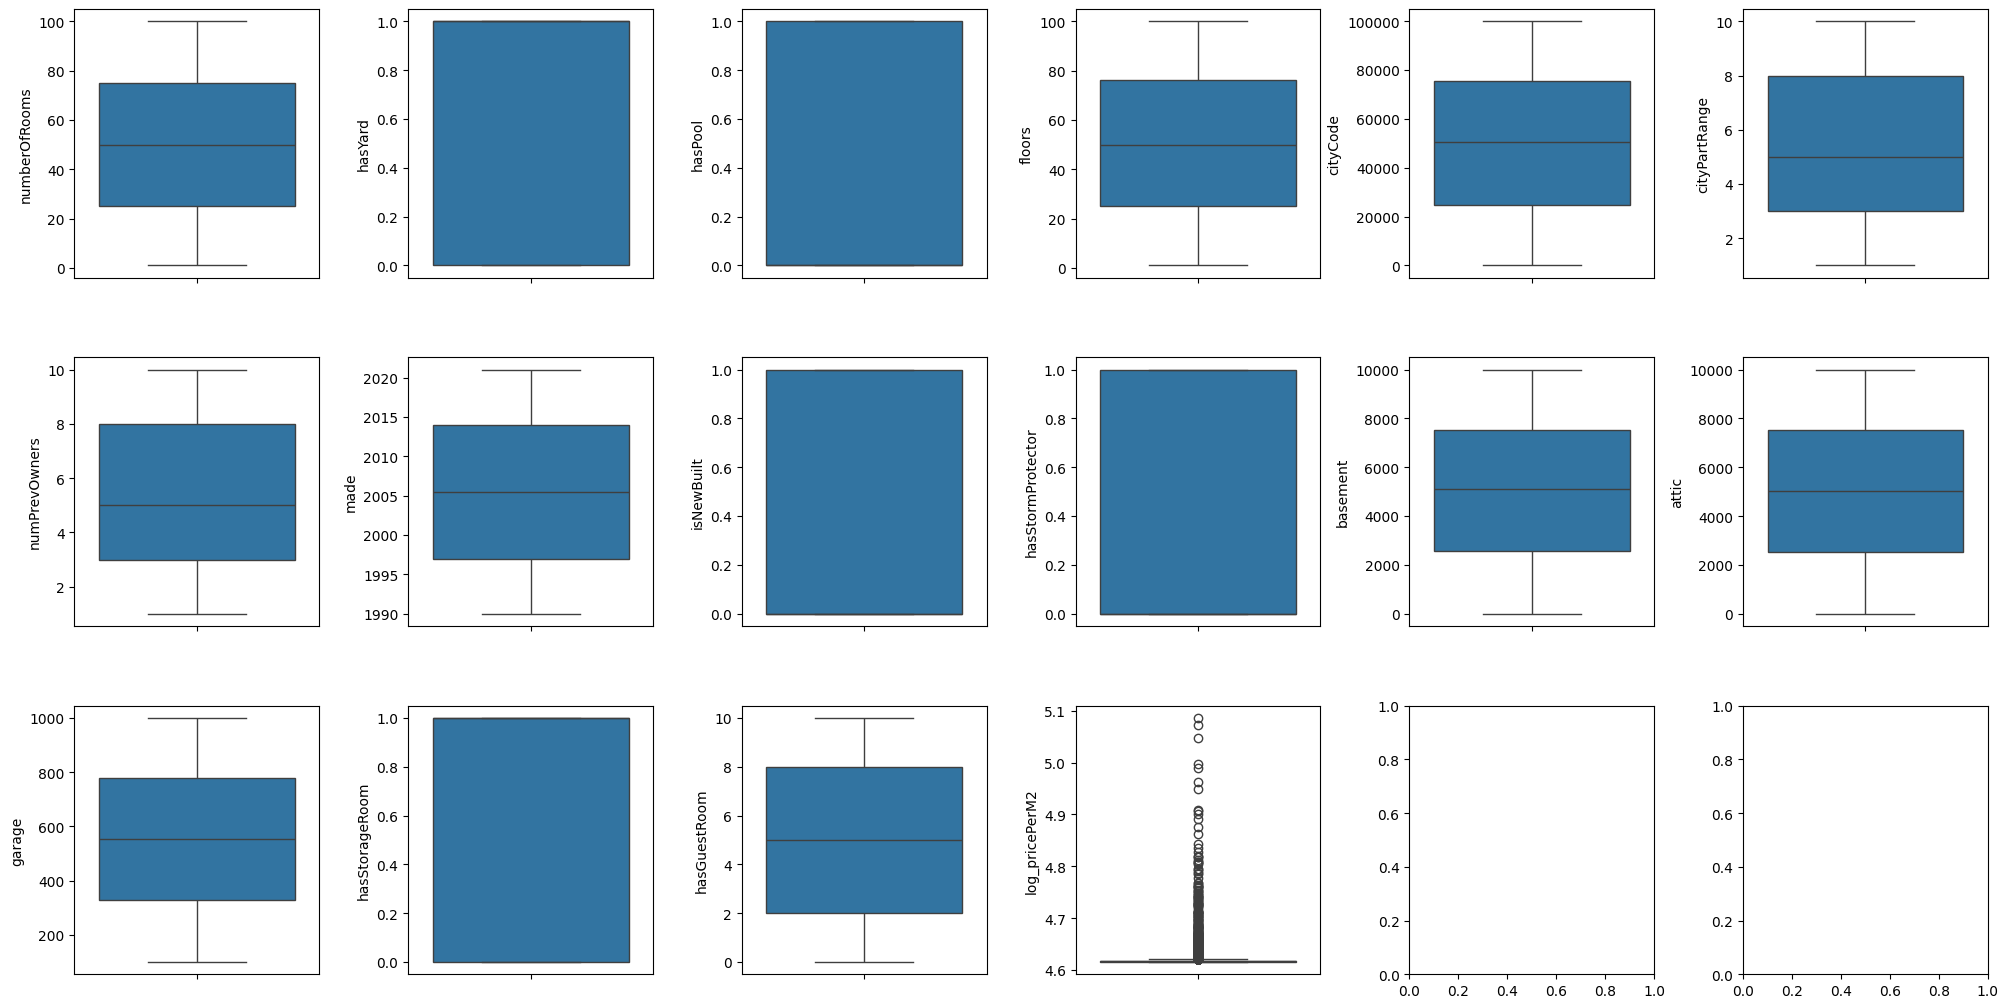

In [79]:
fig, axs = plt.subplots(ncols=6, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Данные все полные и нормально распределены. Можно начинать анализ на TensorFlow

In [80]:
# Анализ корреляции между признаками и целевой переменной
# corr(): вычисляет матрицу корреляции Пирсона между всеми числовыми колонками
correlation_matrix = df.corr()

# Сортировка корреляций с целевой переменной price по убыванию
# sort_values(ascending=False): сортирует значения по убыванию
target_correlation = correlation_matrix['log_pricePerM2'].sort_values(ascending=False)
abs_correlation = target_correlation.drop('log_pricePerM2').abs().sort_values(ascending=False)


print("Корреляция признаков с ценой (log_pricePerM2):")
print(target_correlation)

# Тепловая карта корреляций
# px.imshow: создает heatmap (тепловую карту)
# correlation_matrix.round(2): матрица корреляции, округленная до 2 знаков
# color_continuous_scale='RdBu_r': цветовая шкала от синего к красному (reversed)
# aspect="auto": автоматическое соотношение сторон
# text_auto=True: автоматическое отображение значений в ячейках

fig = px.imshow(correlation_matrix.round(2),
                title='Матрица корреляции признаков',
                aspect="auto",
                color_continuous_scale='RdBu_r',
                text_auto=True)
fig.update_layout(width=800, height=800)  # Размер графика
fig.show()

Корреляция признаков с ценой (log_pricePerM2):
log_pricePerM2       1.000000
hasPool              0.062365
floors               0.049537
hasYard              0.039386
hasGuestRoom         0.021512
hasStormProtector    0.010823
isNewBuilt           0.006362
garage               0.003779
made                 0.003423
hasStorageRoom       0.002961
cityPartRange        0.000114
numberOfRooms       -0.004807
cityCode            -0.006811
attic               -0.007371
basement            -0.012121
numPrevOwners       -0.031151
Name: log_pricePerM2, dtype: float64


In [93]:

from sklearn.preprocessing import StandardScaler

X = df.drop('log_pricePerM2', axis=1)  # Все столбцы кроме целевого
y = df['log_pricePerM2']               # Только целевой столбец
print(X.shape, y.shape)

# ВАЖНО: Масштабируем признаки
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# define the keras model
model = Sequential()
model.add(Dense(64, input_shape=(15,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))
# compile the keras model
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
# fit the keras model on the dataset
model.fit(X_scaled, y, epochs=150, batch_size=50)
# evaluate the keras model
loss, mse = model.evaluate(X_scaled, y)


(10000, 15) (10000,)
Epoch 1/150


c:\Program Files\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.2002 - mse: 2.2002
Epoch 2/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1548 - mse: 0.1548
Epoch 3/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0858 - mse: 0.0858
Epoch 4/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0544 - mse: 0.0544
Epoch 5/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0372 - mse: 0.0372
Epoch 6/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0262 - mse: 0.0262
Epoch 7/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0195 - mse: 0.0195
Epoch 8/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0148 - mse: 0.0148
Epoch 9/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0115 - mse: 0.0115
Epoch 10/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0094 - mse: 0.0094
Epoch 11/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0077 - mse: 0.0077
Epoch 12/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0065 - mse: 0.0065
Epoch 13/150
200/200 ━━━━

In [95]:
print(f'Loss: {loss:.2e}' )

Loss: 3.25e-04
